## IMPORTS

In [1]:
from Inference import BBVI 
import torch
import matplotlib.pyplot as plt

## EXAMPLE

In [2]:
xpName = 'Example'

### Set the Device

In [3]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')

### Load the data

In [4]:
data = torch.load('Data/foong_data.pt')
x_data = data[0].to(device)
y_data = data[1].to(device)
y_data = y_data.unsqueeze(-1)

### Create the network and variational optimizer

In [5]:
networkName = 'BBVI'

In [6]:
Net = BBVI.VariationalNetwork(input_size=1, output_size=1, layer_width=30, nb_layers=2, device=device)

### Make deterministic

In [7]:
Net.make_deterministic_rhos()
Net.requires_grad_rhos(False)

In [8]:
optimizer = torch.optim.Adam
optimizer_params = {'lr': 0.05}

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau
scheduler_params = {'patience': 3, 'factor': 0.8}

In [9]:
voptimizer = BBVI.VariationalOptimizer(model=Net, sigma_noise=0.1, optimizer=optimizer, optimizer_params=optimizer_params, scheduler=scheduler, scheduler_params=scheduler_params)

### Run the variational optimizer

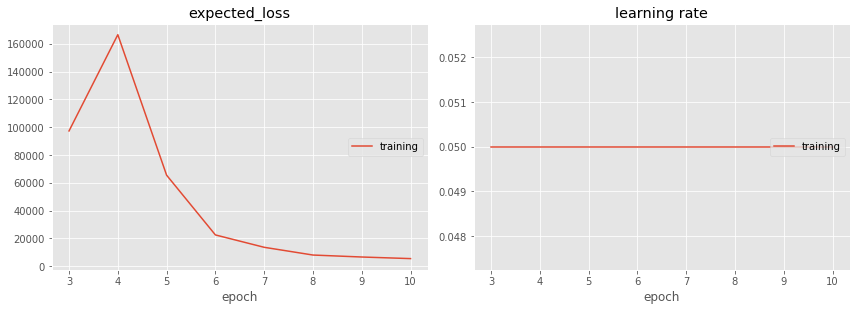

expected_loss:
training   (min: 5412.509, max: 6302525.500, cur: 5412.509)

learning rate:
training   (min:    0.050, max:    0.050, cur:    0.050)


In [10]:
Net = voptimizer.run((x_data,y_data), n_epoch=10, n_iter=10, n_ELBO_samples=1, plot=True, savePath='Results/', xpName=xpName, networkName=networkName, saveName='LOSS')

### Save Network

In [ ]:
torch.save(Net, 'Saved/' + xpName + networkName)

### Load Network

In [ ]:
Net = torch.load('Saved/'+ xpName + networkName)

### Plot the Predictive Distribution

In [ ]:
BBVI.plot_BBVI(model=Net, data=data, device=device, savePath='Results/', xpName=xpName, networkName=networkName, saveName='PD')